<a href="https://colab.research.google.com/github/JacobyNevada/ds_belhard/blob/main/hw2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset head:
      gender  age country subscription_type  listening_time  \
0     Female   54      CA              Free              26   
1      Other   33      DE            Family             141   
2       Male   38      AU           Premium             199   
3     Female   22      CA           Student              36   
4      Other   29      US            Family             250   
...      ...  ...     ...               ...             ...   
7995   Other   44      DE           Student             237   
7996    Male   34      AU           Premium              61   
7997  Female   17      US              Free              81   
7998  Female   34      IN           Student             245   
7999   Other   45      AU              Free             210   

      songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


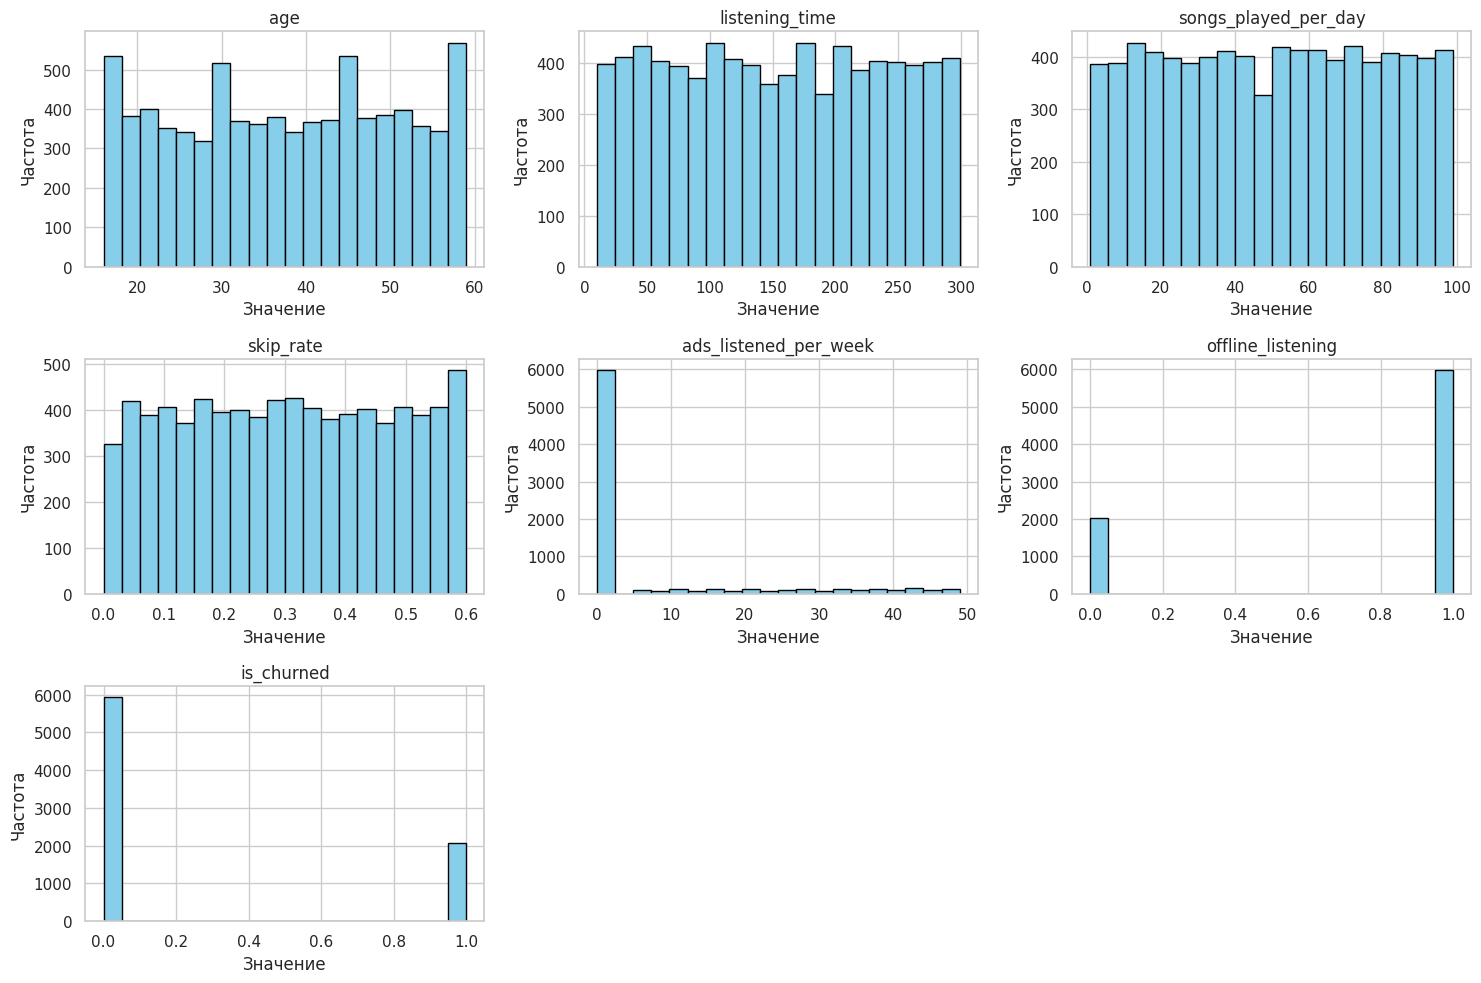

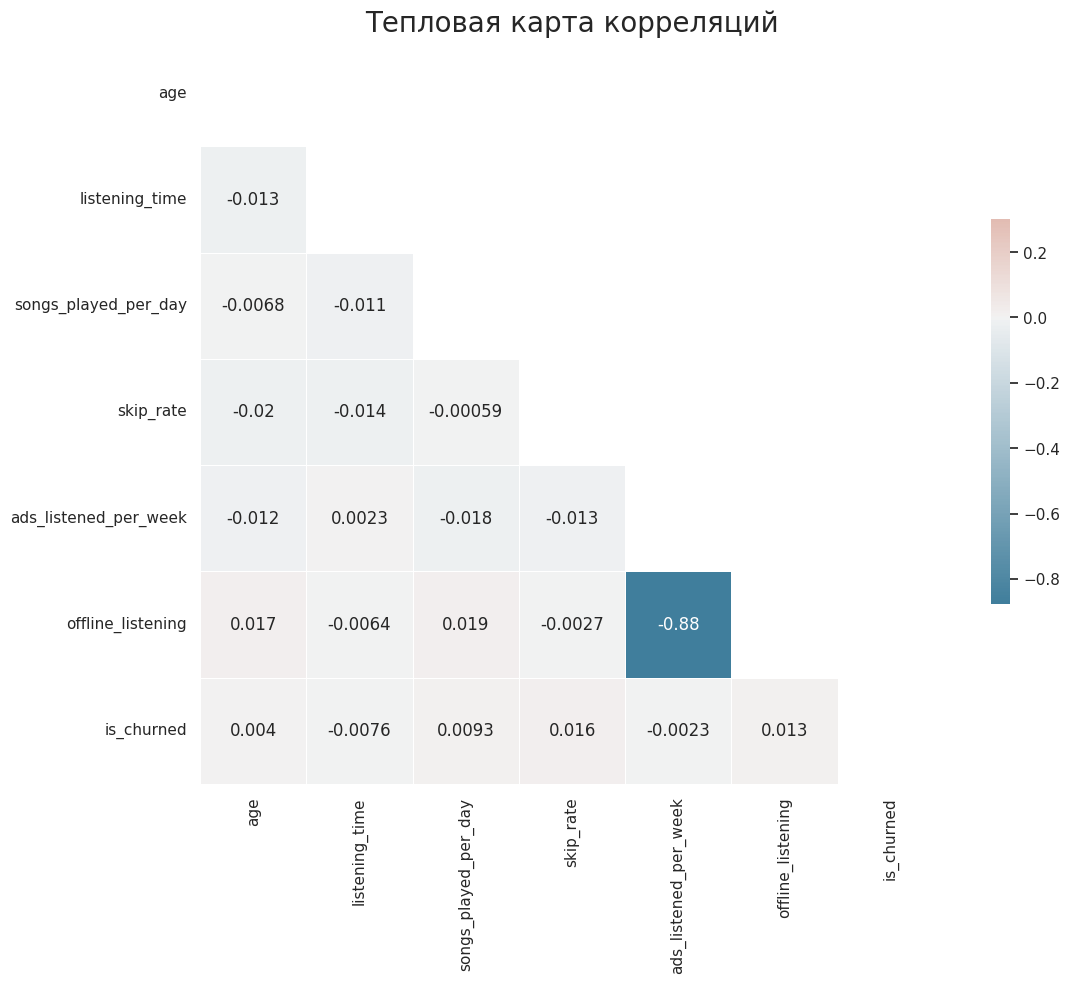

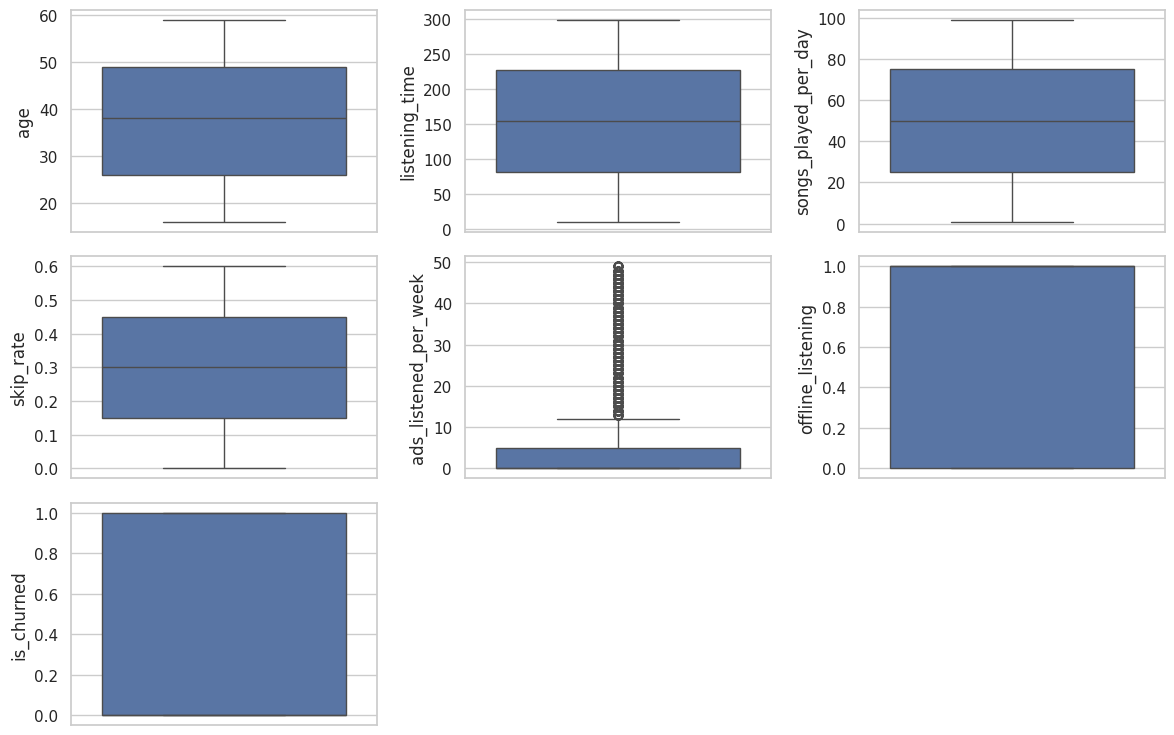

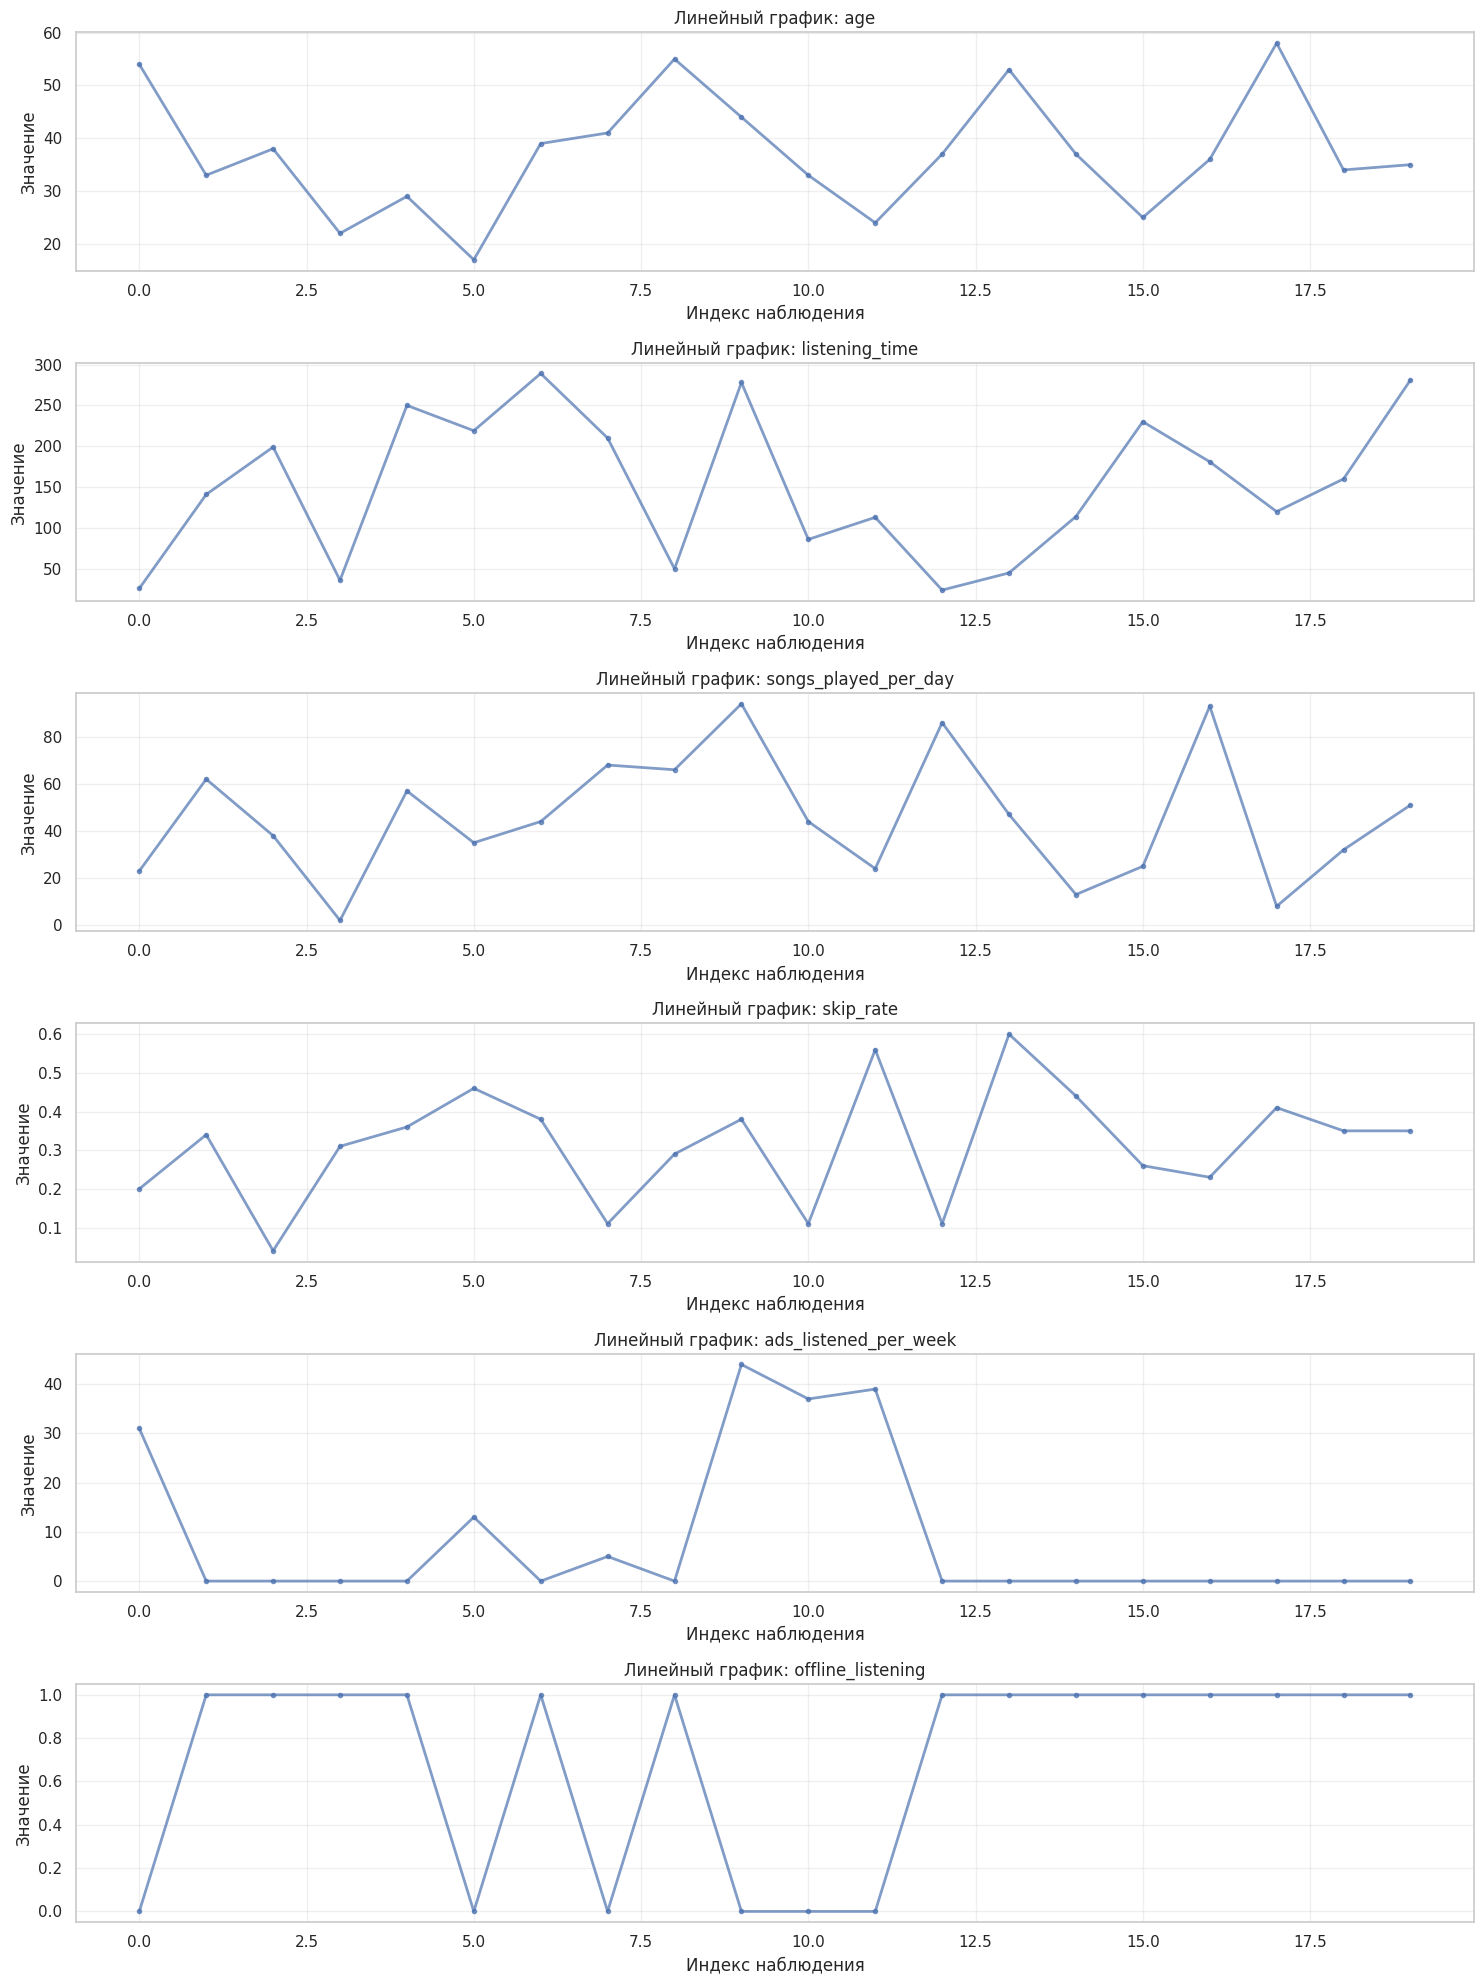

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt


def data_loading(file_link, category, numeric_features, categorical_features):
  '''drive.mount('/content/drive')
  # Загрузка JSON файла
  dataset = pd.read_csv(f"/content/drive/{file_link}")
  return dataset[numeric_features + categorical_features + [category]]'''

  drive.mount('/content/drive')

  # Простое указание типов для ключевых столбцов
  dtype_dict = {
      'age': 'int64',
      'listening_time': 'int64',
      'songs_played_per_day': 'int64',
      'ads_listened_per_week': 'int64',
      'offline_listening': 'int64',
      'is_churned': 'int64',
      'skip_rate': 'float64',
      'gender': 'category',
      'country': 'category',
      'device_type': 'category',
      'subscription_type': 'category'
  }

  # Загружаем только нужные колонки с правильными типами
  all_columns = numeric_features + categorical_features + [category]
  dataset = pd.read_csv(
    f"/content/drive/{file_link}",
    usecols=all_columns,
    dtype={col: dtype_dict[col] for col in all_columns if col in dtype_dict}
  )

  return dataset



def data_processing(dataset, category, numeric_features, categorical_features):
  X = dataset.drop(columns=[category])
  y = dataset[category]

  # Создание препроцессора
  numeric_transformer = StandardScaler()
  categorical_transformer = OneHotEncoder(drop='first')

  preprocessor = ColumnTransformer(
    transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)
      ])

  # Применение препроцессора к данным
  X_processed = preprocessor.fit_transform(X)
  return X_processed, y, preprocessor


def train_model(X, y):
  model = LogisticRegression(solver='lbfgs', max_iter=1000)
  model.fit(X, y)
  return model


def predict(model, X):
  return model.predict(X)


def evaluate_model(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  report = classification_report(y_true, y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  print("\nClassification Report:")
  print(report)
  #return accuracy, report


def visualise_pairplot(dataset, category):
  # Построение парных графиков при помощи sns
  sns.pairplot(dataset, hue=category)
  plt.show()


def visualise_histogram(dataset):
  # Установка стиля Seaborn для красивых графиков
  sns.set(style="whitegrid")

  # Создание гистограмм для каждой числовой переменной
  dataset.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

  # Добавление названий для каждого графика и осей
  for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    #ax.set_title(ax.get_title().replace('wine_class', 'Класс вина'))

  # Регулировка макета для предотвращения наложения подписей
  plt.tight_layout()

  # Показать график
  plt.show()


def visualise_heatmap(dataset):
  sns.set(style="white")

  # Расчет корреляционной матрицы только для числовых данных
  numeric_df = dataset.select_dtypes(include=[np.number])  # Исключаем нечисловые столбцы
  corr = numeric_df.corr()

  # Маска для отображения только нижней треугольной части матрицы (опционально)
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Настройка цветовой палитры
  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  # Создание тепловой карты
  plt.figure(figsize=(12, 10))
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

  # Добавление заголовка
  plt.title('Тепловая карта корреляций', fontsize=20)

  # Показать график
  plt.show()

def visualise_boxplot(dataset):
  sns.set(style="whitegrid")

  # Создаем ящики с усами для каждой колонки в DataFrame
  plt.figure(figsize=(12, 10))

  # Перебираем каждый числовой столбец и создаем для него ящик с усами
  for index, column in enumerate(dataset.select_dtypes(include=[np.number]).columns):
    plt.subplot((len(dataset.columns) // 3) + 1, 3, index + 1)
    sns.boxplot(y=dataset[column])

  plt.tight_layout()
  plt.show()

def visualise_lineplot(dataset, numeric_features):
  sns.set(style="whitegrid")

  # Создаем сетку графиков
  fig, axes = plt.subplots(len(numeric_features), 1, figsize=(15, 20))

  # Для случая с одним графиком (если нужен только один столбец)
  if len(numeric_features) == 1:
      axes = [axes]

  datahead = dataset.head(20)

  # Строим line plot для каждого числового столбца
  for i, column in enumerate(numeric_features):
      axes[i].plot(datahead.index, datahead[column], marker='o', linestyle='-',
                  linewidth=2, markersize=3, alpha=0.7)
      axes[i].set_xlabel('Индекс наблюдения')
      axes[i].set_ylabel('Значение')
      axes[i].set_title(f'Линейный график: {column}')
      axes[i].grid(True, alpha=0.3)

  # Регулировка макета для предотвращения наложения подписей
  plt.tight_layout()

  # Показать график
  plt.show()


def visualise_all_types(dataset, numeric_features):
  visualise_histogram(dataset)
  visualise_heatmap(dataset)
  visualise_boxplot(dataset)
  visualise_lineplot(dataset, numeric_features)


def show_dataset(dataset):
  print(f"\nDataset head:\n{dataset}\n")


def show_info(dataset):
  print(f"\nDataset info:\n{dataset.info()}\n")


def show_describe(dataset):
  print(f"\nDataset describe:\n{dataset.describe()}\n")


def show_types(dataset):
  print(f"\nDataset types:\n{dataset.dtypes}\n")


def show_null_values(dataset):
  print(f"\nDataset null values:\n{dataset.isnull().sum()}\n")


def show_nan_values(dataset):
  print(f"\nDataset NaN values:\n{dataset.isna().sum()}\n")


def show_all_info(dataset):
  show_dataset(dataset)
  show_info(dataset)
  show_describe(dataset)
  show_types(dataset)
  show_null_values(dataset)
  show_nan_values(dataset)


def eliminate_null_nan(dataset, target_column=None):
  dataset = dataset.copy()

  # Заполнение пропусков в датасете
  for column in dataset.columns:
    if dataset[column].isnull().any():
      if column == target_column:
        #continue
        dataset[column] = dataset[column].fillna(0).round().astype('int64')
      elif dataset[column].dtype in ['int32', 'int64']:
        dataset[column].fillna(dataset[column].mean().round().astype(int))
      elif dataset[column].dtype in ['float32', 'float64']:
        dataset[column].fillna(dataset[column].mean())
      elif pd.api.types.is_categorical_dtype(dataset[column]):
        # Для категориальных данных - добавляем 'unknown' в категории
        if 'unknown' not in dataset[column].cat.categories:
          dataset[column] = dataset[column].cat.add_categories('unknown')
          dataset[column] = dataset[column].fillna('unknown')
      else:
        dataset[column].fillna('unknown', inplace=True)
  return dataset


################################

# https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis
file_link = 'MyDrive/Colab Notebooks/spotify_churn_dataset.csv'

# Определение числовых и категориальных признаков
numeric_features = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening']
categorical_features = ['gender', 'country', 'device_type', 'subscription_type']
category = 'is_churned'

# Загружаем информацию
dataset = data_loading(file_link, category, numeric_features, categorical_features)

# Не получилось нормально обрабатывать None значения
'''dataset.loc[len(dataset)] = {
    'age': 25,
    'listening_time': 150,
    'songs_played_per_day': None,
    'skip_rate': 0.3,
    'ads_listened_per_week': 5,
    'offline_listening': 1,
    'gender': 'Male',
    'country': None,
    'device_type': 'Mobile',
    'subscription_type': 'Premium',
    'is_churned': 0
}'''


# Показать всю информацию о датасете
show_all_info(dataset)

# Обработка информации
X, y, preprocessor = data_processing(dataset, category, numeric_features, categorical_features)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = train_model(X_train, y_train)

# Предсказание на тестовых данных
y_pred = predict(model, X_test)

# Оценка модели
evaluate_model(y_test, y_pred)

# Показать все визуализации
visualise_all_types(dataset, numeric_features)